In [1]:
# esta celda controla el estilo del cuaderno
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

# KSchool - Master Online Data Science 

## Técnicas Avanzadas de Inteligencia Artificial

### Módulo 4: Procesamiento del Lenguaje Natural - Videoconferencia

# Modelos de Lenguaje y Similitud Semántica

En esta presentación vamos a continuar trabajando con modelos de lenguaje ya pre-entrenados, intentando entender cómo funcionan y viendo ejemplos concretos de uso.


## HuggingFace

[HuggingFace](https://huggingface.co) se ha convertido en todo un reference en el mundo del PLN. 

- fueron los primeros en distribuir una versión de BERT compatible con PyTorch.
- crearon un interfaz interoperable entre TensorFlow y PyTorch.
- su librería `transformers` permite acceder a decenas de modelos con arquitecturas diferentes con una interfaz común.
- su librería `datasets` permite acceder a decenas de datasets e interaccionar con nuestros propios datos de manera sencilla 
- han creado un repositorio de modelos de lenguaje

Vamos a recorrer uno de sus principales recursos: la [central de modelos](https://huggingface.co/models), un repositorio público de modelos de lenguaje ya preentrenados.

DistilGPT-2 es una versión de tamaño reducido del célebre modelo [GPT-2](https://openai.com/blog/better-language-models/), desarrollado por OpenAI en 2019.

In [2]:
import numpy as np 
import torch

from transformers import AutoTokenizer, AutoModelForCausalLM

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
gpt2_tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
gpt2_model = AutoModelForCausalLM.from_pretrained("distilgpt2")

gpt2_model.to(device)
gpt2_model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )


In [4]:
text = """The US president announced earlier today"""
 
input_ids = torch.tensor(gpt2_tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
 
outputs = gpt2_model.generate(
    input_ids.to(device), 
    max_length=50,
    do_sample=True,
    top_k=20,
    temperature=0.7
    )
 
print(gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True))
# outputs.shape,outputs[0].shape

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The US president announced earlier today that he planned to meet with President Barack Obama in Philadelphia to discuss the economic and environmental challenges facing the country.
























[GPT-3](https://openai.com/blog/gpt-3-apps/) es la última versión de este modelo de lenguaje masivo desarrollado por OpenAI, publicada en 2021. [No está disponible en abierto](https://gpt3-openai.com/), pero un grupo de investigadores llamado [Eleuther AI](https://www.eleuther.ai/) ha entrenado una versión alternativa por su cuenta.

In [5]:
gpt3_tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")
gpt3_model = AutoModelForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B")

gpt3_model.to(device)
gpt3_model.eval()

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 2048)
    (wpe): Embedding(2048, 2048)
    (drop): Dropout(p=0, inplace=False)
    (h): ModuleList(
      (0): GPTNeoBlock(
        (ln_1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0, inplace=False)
            (resid_dropout): Dropout(p=0, inplace=False)
            (k_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (v_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (out_proj): Linear(in_features=2048, out_features=2048, bias=True)
          )
        )
        (ln_2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear(in_features=2048, out_features=8192, bias=True)
          (c_proj): Linear(in_fea

In [6]:
text = """The US president announced earlier today"""
 
input_ids = torch.tensor(gpt3_tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
 
outputs = gpt3_model.generate(
    input_ids.to(device), 
    max_length=50,
    do_sample=True,
    top_k=20,
    temperature=0.7
    )
 
print(gpt3_tokenizer.decode(outputs[0], skip_special_tokens=True))
# outputs.shape,outputs[0].shape

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The US president announced earlier today that he is banning citizens from eight Muslim-majority countries from entering the US.

Trump’s order was met with a mixture of outrage and confusion: Some people wondered whether the ban would be permanent. Others


## Modelos de similitud semántica

El model hub de HF dispone de una buena variedad de [modelos de lenguaje ajustados para tareas de similitud semántica](https://huggingface.co/models?pipeline_tag=sentence-similarity&sort=downloads).

In [7]:
from sentence_transformers import SentenceTransformer

ss_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [8]:
embedding = ss_model.encode("I love tacos and micheladas")

print(embedding.shape)
print(embedding[:20])

(384,)
[ 0.02581616 -0.04349976  0.00275867  0.05571699 -0.11297643 -0.05730031
 -0.00591045 -0.07152289  0.06381126 -0.0559051   0.07703821 -0.03750667
 -0.06983155  0.01067864  0.00892696 -0.08629537  0.11110803 -0.02189265
  0.03547302 -0.03927391]


In [9]:
embedding = ss_model.encode(["I don't like it", "I like it"])
print(embedding.shape)

(2, 384)


In [10]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
    "Am I younger than you?",
]

embeddings_en = ss_model.encode(messages)

Una vez codificados nuestros textos de ejemplo como vectores, vamos a crear una base de datos de embeddings de manera que podamos lanzar búsquedas basadas en similitud semántica. Para ello, vamos a aprovechar la librería [DocArray](https://docarray.jina.ai/) de [Jina.ai](https://jina.ai), otra empresa de la que merece estar al tanto.

In [11]:
from docarray import DocumentArray, Document

da = DocumentArray([Document(text=m, embedding=embeddings_en[i]) for i, m in enumerate(messages)])

In [12]:
def similarity_search(
    q: str, 
    model: SentenceTransformer = ss_model, 
    da: DocumentArray = da,
    n: int = 3
) -> None:
    query = (
        Document(text=q, embedding=model.encode(q))
        .match(da, limit=n, exclude_self=True, metric="cosine")
        )

    return [(m.text, m.scores["cosine"].value) for m in query.matches]


In [13]:
similarity_search(q="My handheld device has two screens")

[('Your cellphone looks great.', 0.69342476),
 ('My phone is not good.', 0.70689785),
 ('I like my phone', 0.80420583)]

In [14]:
similarity_search(q="Mostly dry. Freeze-thaw conditions (max 50°F on Mon afternoon, min 32°F on Tue night).")

[('Will it snow tomorrow?', 0.607095),
 ('Global warming is real', 0.8087729),
 ('Is paleo better than keto?', 0.8135161)]

In [15]:
similarity_search(q="I'm 40 years old")

[('How old are you?', 0.4854288),
 ('what is your age?', 0.5811293),
 ('Am I younger than you?', 0.5909041)]

In [16]:
import seaborn as sns

def plot_similarity(labels, features):
    """Dibuja un mapa de calor con las distancias de similitud"""
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
        corr,
        xticklabels=labels,
        yticklabels=labels,
        vmin=0,
        vmax=1,
        cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=90)
    g.set_title("Similitud Semántica")

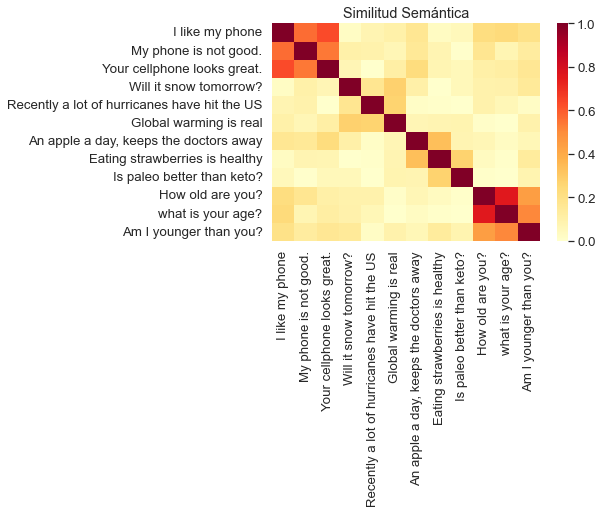

In [17]:
plot_similarity(messages, embeddings_en)

In [18]:
ss_model_es = SentenceTransformer("mrm8488/distiluse-base-multilingual-cased-v2-finetuned-stsb_multi_mt-es")

In [19]:
mensajes = [
    "Me gusta mi teléfono.",
    "Mi móvil no es muy bueno.",
    "Tu celu se ve bien caro.",

    "¿Va a nevar mañana?",
    "Ha habido muchos huracanes en EEUU este año",
    "El calentamiento global es real",

    "El que come una manzana aleja al médico de su cama",
    "Comer fruta y verdura es muy saludable",
    "¿Es mejor hacer dieta paleo o keto?",

    "¿Cuántos años tienes?",
    "¿Cuál es tu edad?",
    "¿Soy más joven que usted o más viejo?",
]

embeddings_es = ss_model_es.encode(mensajes)
da_es = DocumentArray([Document(text=m, embedding=embeddings_es[i]) for i, m in enumerate(mensajes)])

In [20]:
print(embeddings_es.shape)

(12, 768)


In [21]:
similarity_search(q="Samsung, Xiaomi y Apple se reparten el mercado", model=ss_model_es, da=da_es)

[('Mi móvil no es muy bueno.', 0.7078624),
 ('Me gusta mi teléfono.', 0.73813176),
 ('El que come una manzana aleja al médico de su cama', 0.9086035)]

In [22]:
similarity_search(q="No soy un niñato, tengo más de 40 palos", model=ss_model_es, da=da_es)

[('¿Soy más joven que usted o más viejo?', 0.45822948),
 ('¿Cuál es tu edad?', 0.5700361),
 ('¿Cuántos años tienes?', 0.59768116)]

In [23]:
similarity_search(q="Podría comer gazpacho y tortilla de patatas todos los días", model=ss_model_es, da=da_es)

[('Comer fruta y verdura es muy saludable', 0.46173513),
 ('¿Es mejor hacer dieta paleo o keto?', 0.5399758),
 ('El que come una manzana aleja al médico de su cama', 0.5504545)]

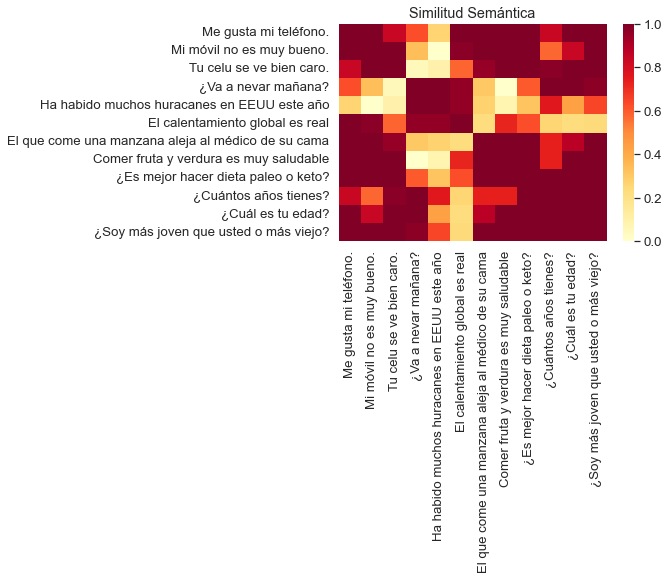

In [24]:
plot_similarity(mensajes, embeddings_es)

## Universal Sentence Encoder

El ecosistema TensorFlow tiene su propio repositorio público de modelos: [TFHub](https://tfhub.dev). Hay varios modelos, pero probablemente uno de los más interesantes es [Universal Sentence Encoder (USE)](https://tfhub.dev/google/universal-sentence-encoder/4).

In [25]:
import tensorflow as tf
import tensorflow_text
import tensorflow_hub as hub

In [26]:
USE_URL = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model = hub.load(USE_URL)

In [27]:
e = use_model(["hello"])
e[0].shape

TensorShape([512])

In [28]:
use_embeddings = use_model(messages)
print(use_embeddings.shape)

use_da = DocumentArray([Document(text=m, embedding=use_embeddings[i]) for i, m in enumerate(messages)])

(12, 512)


In [29]:
def use_similarity_search(
    q: str, 
    model, 
    da,
    n: int = 3
) -> None:
    query = (
        Document(text=q, embedding=model([q])[0])
        .match(da, limit=n, exclude_self=True, metric="cosine")
        )

    return [(m.text, m.scores["cosine"].value) for m in query.matches]

In [30]:
use_similarity_search(q="My handheld device has two screens", model=use_model, da=use_da)

[('My phone is not good.', 0.70316726),
 ('I like my phone', 0.7165936),
 ('Your cellphone looks great.', 0.7431156)]

In [31]:
use_similarity_search(q="Mostly dry. Freeze-thaw conditions (max 50°F on Mon afternoon, min 32°F on Tue night).", model=use_model, da=use_da)

[('Will it snow tomorrow?', 0.8737476),
 ('My phone is not good.', 0.9165056),
 ('Eating strawberries is healthy', 0.9337682)]

In [32]:
use_similarity_search(q="I'm 40 years old", model=use_model, da=use_da)

[('Am I younger than you?', 0.47565788),
 ('what is your age?', 0.57059836),
 ('How old are you?', 0.6015518)]

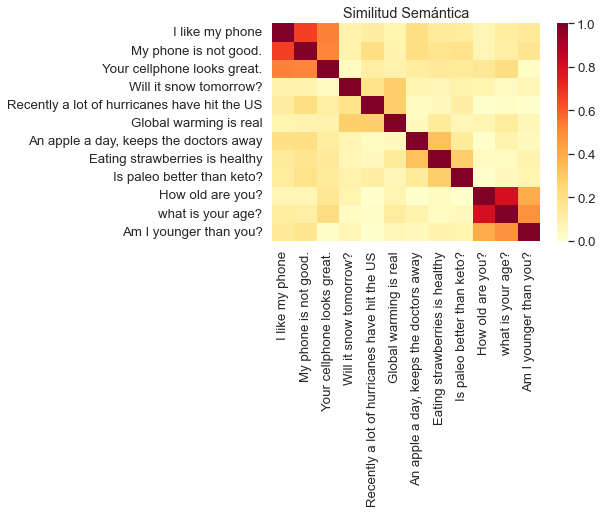

In [33]:
plot_similarity(messages, use_embeddings)

¿Qué tal funciona USE en español? No hay un modelo monolingüe específico, pero sí existe una variante multilingüe que se ha entrenado en varios idiomas. Probemos uno de ellos.

In [34]:
MULTI_USE_URL = "https://tfhub.dev/google/universal-sentence-encoder-multilingual/3"
multi_use_model = hub.load(MULTI_USE_URL)

In [35]:
use_embeddings_es = multi_use_model(mensajes)
print(use_embeddings_es.shape)

use_da_es = DocumentArray([Document(text=m, embedding=use_embeddings_es[i]) for i, m in enumerate(mensajes)])

(12, 512)


In [36]:
use_similarity_search(q="Samsung, Xiaomi y Apple se reparten el mercado", model=multi_use_model, da=use_da_es)

[('El que come una manzana aleja al médico de su cama', 0.73944545),
 ('Mi móvil no es muy bueno.', 0.7943012),
 ('Comer fruta y verdura es muy saludable', 0.8211712)]

In [37]:
use_similarity_search(q="No soy un niñato, tengo más de 40 palos", model=multi_use_model, da=use_da_es)

[('¿Soy más joven que usted o más viejo?', 0.7433404),
 ('Mi móvil no es muy bueno.', 0.8029609),
 ('¿Cuántos años tienes?', 0.84470975)]

In [38]:
use_similarity_search(q="Podría comer gazpacho y tortilla de patatas todos los días", model=multi_use_model, da=use_da_es)

[('Comer fruta y verdura es muy saludable', 0.5611667),
 ('¿Es mejor hacer dieta paleo o keto?', 0.67648935),
 ('El que come una manzana aleja al médico de su cama', 0.7888062)]

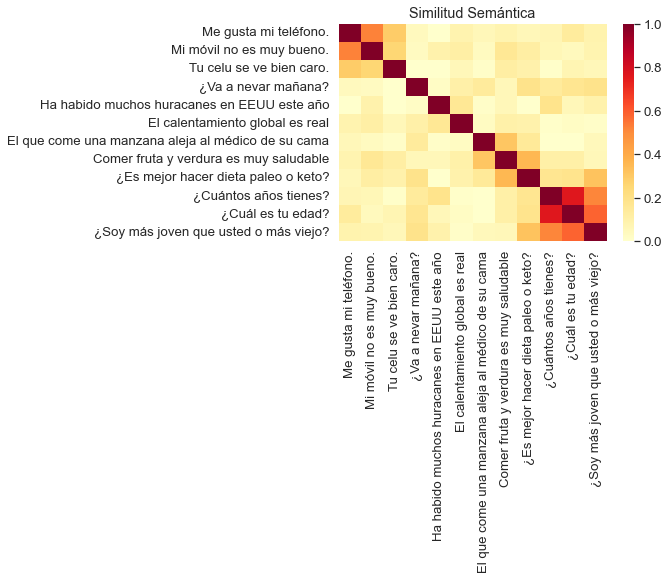

In [39]:
plot_similarity(mensajes, use_embeddings_es)